In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [3]:
data=pd.read_csv(r"C:\Users\Aiman\Downloads\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data["total_bedrooms"].fillna(data["total_bedrooms"].mean(),inplace=True)

C:\Users\Aiman\AppData\Local\Temp\ipykernel_872\1182925694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].mean(),inplace=True)


In [8]:
data["total_bedrooms"].isnull().sum()

0

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
data.drop_duplicates("total_bedrooms",inplace=True)

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
data=data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [14]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

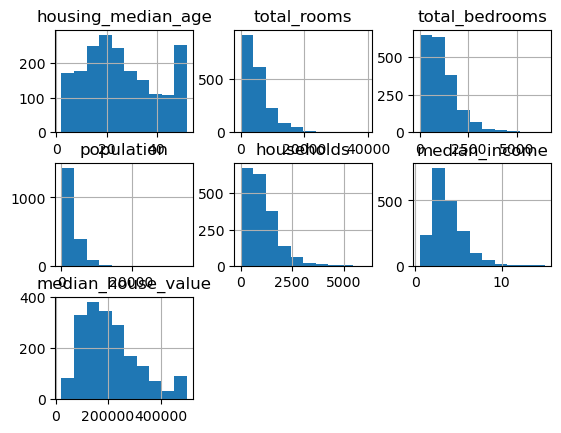

In [15]:
data.hist()

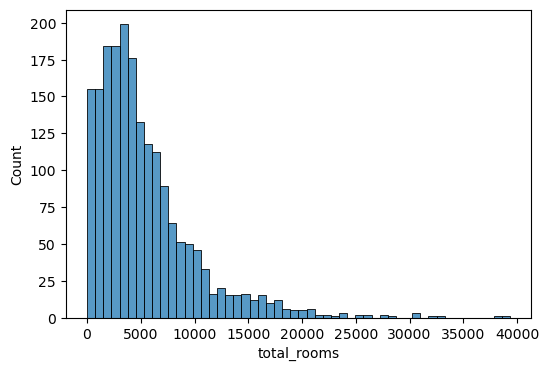

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data.total_rooms)
plt.show()

In [17]:
data.total_rooms.skew()

2.0949674786737584

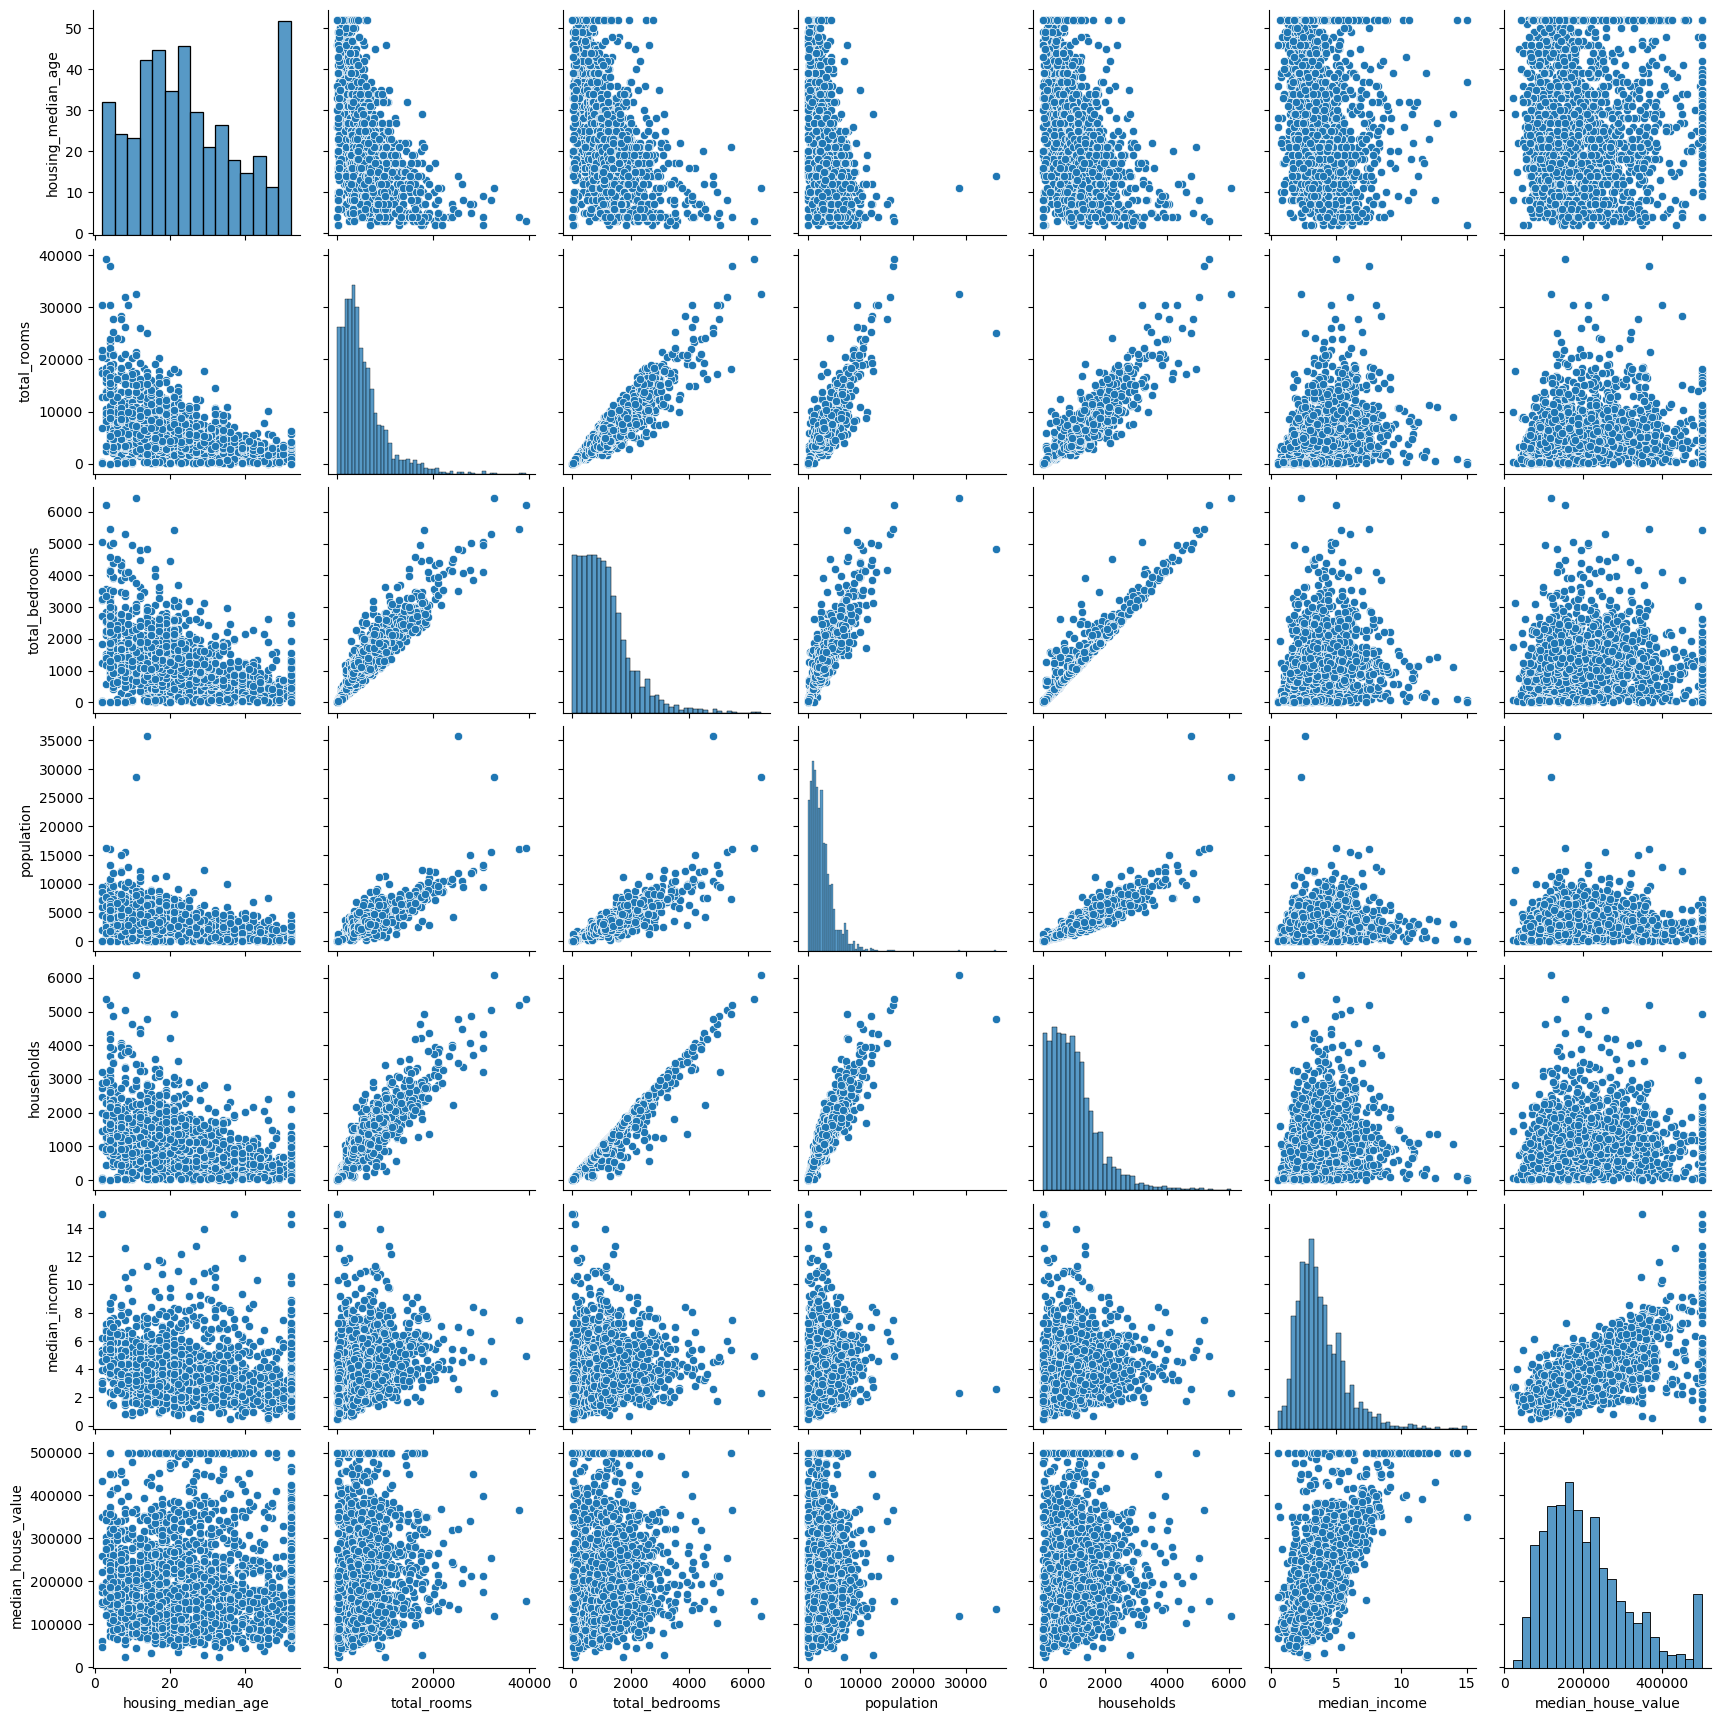

In [18]:
sns.pairplot(data)

In [19]:
data["updated_total_rooms"],lambda_val=boxcox(data.total_rooms)

In [20]:
lambda_val

0.31462993231975384

In [21]:
data.updated_total_rooms.skew()

0.01450343074993045

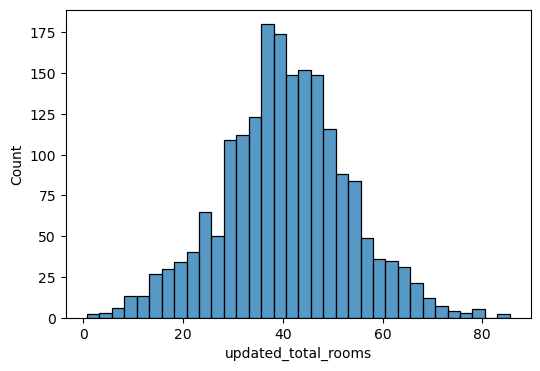

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_total_rooms)
plt.show()

In [23]:
data.total_bedrooms.skew()

1.5551673717920633

In [24]:
data["updated_total_bedrooms"],lambda_val=boxcox(data.total_bedrooms)

In [25]:
lambda_val

0.3930607248481953

In [26]:
data.updated_total_bedrooms.skew()

-0.03166768234156215

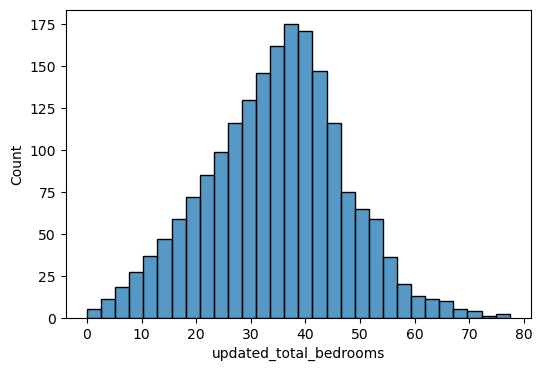

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_total_bedrooms)
plt.show()

In [28]:
data.population.skew()

3.256954043597479

In [29]:
data["updated_population"],lambda_val=boxcox(data.population)


In [30]:
lambda_val

0.3139514914876109

In [31]:
data.updated_population.skew()

0.019932340647499883

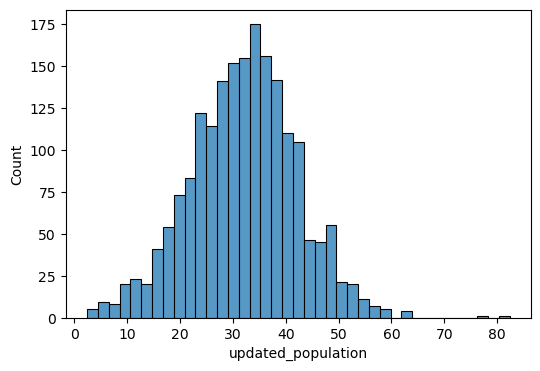

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_population)
plt.show()

In [33]:
data.households.skew()

1.5879983630531767

In [34]:
data["updated_households"],lambda_val=boxcox(data.households)


In [35]:
lambda_val

0.3929224950875293

In [36]:
data.updated_households.skew()

-0.029649311368897258

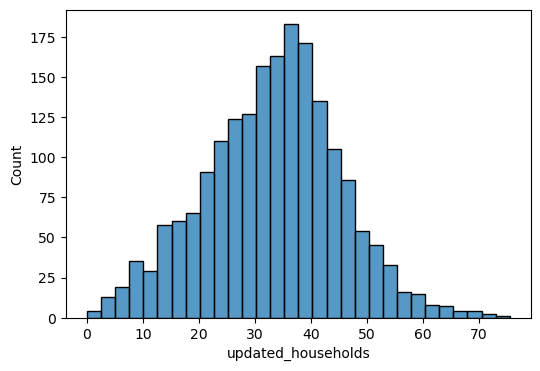

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_households)
plt.show()

In [38]:
data.median_income.skew()

1.5579527497575356

In [39]:
data["updated_median_income"],lambda_val=boxcox(data.median_income)


In [40]:
lambda_val

0.15013475134571203

In [41]:
data.updated_median_income.skew()

0.011689908611799372

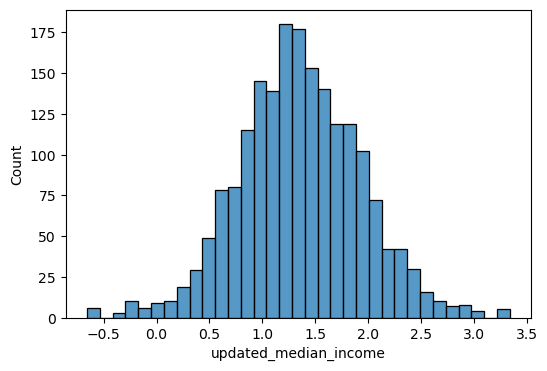

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_median_income)
plt.show()

In [43]:
data.median_house_value.skew()

0.9561336509326439

In [44]:
data["updated_median_house_value"],lambda_val=boxcox(data.median_house_value)


In [45]:
lambda_val

0.18307854998755121

In [46]:
data.updated_median_house_value.skew()

-0.01111408330869654

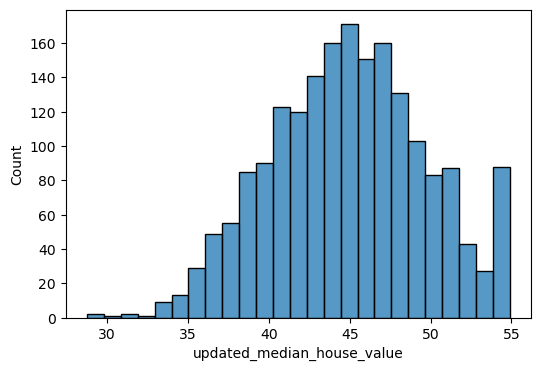

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_median_house_value)
plt.show()

In [48]:
data.housing_median_age.skew()

0.3936545718992803

In [49]:
data["updated_housing_median_age"],lambda_val=boxcox(data.housing_median_age)


In [50]:
lambda_val

0.5137480385401596

In [51]:
data.updated_housing_median_age.skew()

-0.10702279353437366

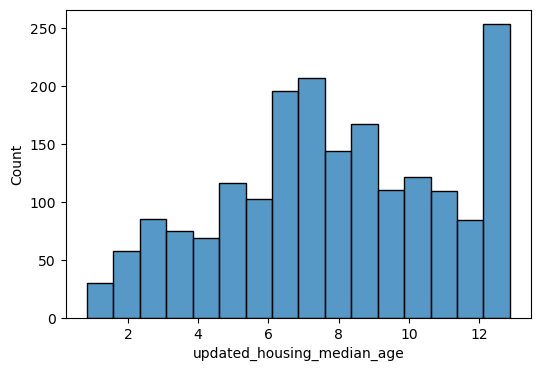

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_housing_median_age)
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
data["housing_median_age"]=scaler.fit_transform(data[["housing_median_age"]])
data["total_rooms"]=scaler.fit_transform(data[["total_rooms"]])
data["total_bedrooms"]=scaler.fit_transform(data[["total_bedrooms"]])
data["population"]=scaler.fit_transform(data[["population"]])
data["households"]=scaler.fit_transform(data[["households"]])
data["median_income"]=scaler.fit_transform(data[["median_income"]])
data["median_house_value"]=scaler.fit_transform(data[["median_house_value"]])

In [55]:
x=data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y=data["median_house_value"]

In [56]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.057524,-0.952079,-1.136626,-0.995557,-1.124571,2.404276
1,-0.314939,0.366735,-0.014630,-0.133802,0.158423,2.391687
2,1.812378,-0.827599,-1.066573,-0.923433,-1.059914,1.839463
3,1.812378,-0.868527,-1.014894,-0.897734,-1.006667,0.985581
4,1.812378,-0.793669,-0.963216,-0.894833,-0.955956,0.035111


<Axes: >

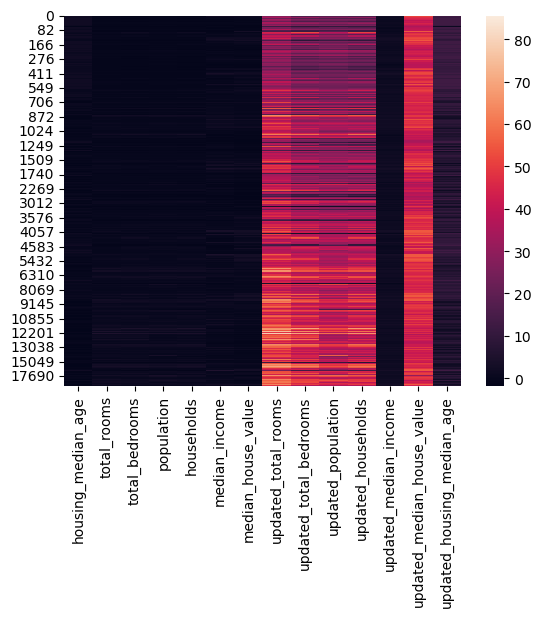

In [57]:
sns.heatmap(data)

In [123]:
x.shape,y.shape

((1924, 6), (1924,))

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
y_train.shape,y_test.shape

((1539,), (385,))

In [127]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [129]:
model.intercept_, model.coef_

(-0.006156969160903216,
 array([ 0.21048353, -0.52641159,  0.40508185, -0.32231175,  0.51951635,
         0.81012192]))

In [131]:
predited_val = model.predict(x_test)

In [132]:
predited_val

array([ 7.67397176e-01, -2.22061447e-01, -3.56176332e-01, -2.88911971e-01,
        6.85642873e-01, -2.80268816e-02,  1.23397147e-01, -3.56114547e-02,
        5.39365180e-01, -5.43842297e-01, -2.99594636e-01, -2.70196032e-02,
        1.79532191e+00,  2.17293108e-01,  2.14067994e-01,  6.80510563e-01,
        4.70941895e-01,  4.43234680e-01,  2.98541405e+00,  5.88397399e-01,
        1.03758807e+00,  9.75328490e-01,  1.68195673e+00,  4.21494687e-01,
       -1.41853253e-01,  9.43205541e-01, -5.11156542e-02,  6.89451436e-01,
       -6.66437408e-01, -2.23509684e-01,  1.10206641e-01,  1.18643741e+00,
       -2.95808076e-01,  6.36768522e-01, -5.45250154e-01,  9.05973232e-01,
       -3.07075675e-01, -9.72584631e-01, -6.12160100e-01,  3.86349710e-01,
        1.34136340e-01,  4.58239742e-01,  6.53903491e-01, -4.68615218e-01,
       -3.51222221e-01,  8.56296833e-01,  2.38710792e-01, -3.92433553e-01,
        6.23343375e-01, -9.58097642e-02, -5.70526047e-01, -5.11015111e-01,
       -6.40045257e-01, -

In [133]:
mean_squared_error(y_test,predited_val)*100   

49.918207386971424

In [134]:
r2_score(y_test,predited_val)

0.5875243910122898